In [120]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from PIL import Image
from PIL.ExifTags import TAGS
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

plt.style.use(["ggplot", "seaborn-poster"])
%matplotlib inline
RD = lambda x: np.round(x, 3)

In [2]:
def plot_grid_images(samples, how_many = 20):
    def display_image(ax, image, label, prediction):
        ax.set_title(
            f"Label: {label}, Prediction: {prediction}", 
            fontsize = 10, color = 'red'
        )

        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        
    how_many = how_many * 3
    last = (samples.shape[0] // 3) * 3
    f, axarr  = plt.subplots(1, 3, figsize = (16, 16))
    for row, sample in samples.iterrows():
        image = Image.open(sample['path'])
        image = image.resize((456, 456))

        axis       = None
        label      = sample['label']
        preds      = sample['voting']
        
        if row % 3 == 0:
            axis = axarr[0]

        if row % 3 == 1:
            axis = axarr[1]

        if row % 3 == 2:
            axis = axarr[2]

        display_image(axis, image, label, preds)

        if row == how_many: break

        if row != 0 and row % 3 == 0:
            plt.show()
            f, axarr = plt.subplots(1, 3, figsize = (16, 16))

        if row == last: break

In [3]:
PATH_TO_BASE     = '../data/detect-targets-in-radar-signals/'
PATH_TO_TRAIN_FE = '../data/detect-targets-in-radar-signals/train_fe.csv'
PATH_TO_TEST_FE  = '../data/detect-targets-in-radar-signals/test_fe.csv'
PATH_TO_RESULTS  = '../oof/oof_rebuild.csv'

train_df = pd.read_csv(PATH_TO_TRAIN_FE)
test_df  = pd.read_csv(PATH_TO_TEST_FE)
results  = pd.read_csv(PATH_TO_RESULTS)

results  = pd.merge(train_df[['id', 'path', 'isNoisy']], results, on = 'id')
results['path'] = results['path'].apply(lambda x: "../" + x)

results.rename(columns = {'isNoisy': 'is_noisy'}, inplace = True)
test_df.rename(columns = {'isNoisy': 'is_noisy'}, inplace = True)
display(results)

,id,path,is_noisy,label,Stage-0-GPU-0-Model-1,Stage-0-GPU-0-Model-2,Stage-0-GPU-1-Model-0,Stage-0-GPU-1-Model-1,Stage-0-GPU-1-Model-2
0,ae36b992-7c8d-42c6-851f-51aca56285ec.png,../data/detect-targets-in-radar-signals/train/...,1,0,0,0,0,0,0
1,09c10b66-6d7e-4688-aa26-42b75cf5e1e9.png,../data/detect-targets-in-radar-signals/train/...,0,0,0,0,0,0,0
2,da6684f7-aabb-49e6-8bb0-c4e048e2dbba.png,../data/detect-targets-in-radar-signals/train/...,0,1,0,0,0,0,0
3,032dd82e-8776-476c-8d80-8e67d1d4909f.png,../data/detect-targets-in-radar-signals/train/...,0,4,4,4,3,4,3
4,e0a6d04b-18fa-4b15-89e2-6cb74fbcf437.png,../data/detect-targets-in-radar-signals/train/...,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
15495,b0b08f42-83f2-424d-bf29-85a1e55606fd.png,../data/detect-targets-in-radar-signals/train/...,0,0,0,0,0,0,0
15496,05bb64ec-cc16-4260-ad37-de5c4139ae39.png,../data/detect-targets-in-radar-signals/train/...,0,3,2,3,2,2,2
15497,f3417069-c8b0-4a59-a834-4f44932eab30.png,../data/detect-targets-in-radar-signals/train/...,0,4,4,4,4,4,4
15498,c65d1b1c-2c52-4c79-8b04-068798fa6734.png,../data/detect-targets-in-radar-signals/train/...,0,2,1,0,0,0,0


In [9]:
train_noisy = results[results['is_noisy'] == 1].reset_index(drop = True)
train_clear = results[results['is_noisy'] == 0].reset_index(drop = True)

test_noisy = test_df[test_df['is_noisy'] == 1].reset_index(drop = True)
test_clear = test_df[test_df['is_noisy'] == 0].reset_index(drop = True)

print('=' * 55)
print(f"No. of train noisy samples: {train_noisy.shape[0]}")
print(f"No. of train clear samples: {train_clear.shape[0]}")

print(f"No. of test noisy samples: {test_noisy.shape[0]}")
print(f"No. of test clear samples: {test_clear.shape[0]}")

models = [column for column in results.columns.tolist() if "Stage" in column]

print('=' * 55)
for model in models:
    print(f"[Noisy] Model {model}: {accuracy_score(train_noisy['label'], train_noisy[model])}")
    print(f"[Clear] Model {model}: {accuracy_score(train_clear['label'],  train_clear[model])}")
    print(f"[All]   Model {model}: {accuracy_score(results['label'], results[model])}")
    print('=' * 55)

No. of train noisy samples: 4278
No. of train clear samples: 11222
No. of test noisy samples: 1500
No. of test clear samples: 4000
[Noisy] Model Stage-0-GPU-0-Model-1: 0.5212716222533894
[Clear] Model Stage-0-GPU-0-Model-1: 0.8070753876314383
[All]   Model Stage-0-GPU-0-Model-1: 0.7281935483870968
[Noisy] Model Stage-0-GPU-0-Model-2: 0.5196353436185134
[Clear] Model Stage-0-GPU-0-Model-2: 0.8113527000534664
[All]   Model Stage-0-GPU-0-Model-2: 0.7308387096774194
[Noisy] Model Stage-0-GPU-1-Model-0: 0.48153342683496964
[Clear] Model Stage-0-GPU-1-Model-0: 0.7985207627873819
[All]   Model Stage-0-GPU-1-Model-0: 0.7110322580645161
[Noisy] Model Stage-0-GPU-1-Model-1: 0.5409069658719028
[Clear] Model Stage-0-GPU-1-Model-1: 0.8242737479950099
[All]   Model Stage-0-GPU-1-Model-1: 0.7460645161290322
[Noisy] Model Stage-0-GPU-1-Model-2: 0.49251986909770923
[Clear] Model Stage-0-GPU-1-Model-2: 0.7747282124398502
[All]   Model Stage-0-GPU-1-Model-2: 0.6968387096774193


Voting Accuracy: 0.7476774193548387
Voting Wrong: 3911  (0.252)  -> Noisy: 1969 (0.503) -> Clear: 1942 (0.497)
Voting Good:  11589 (0.748)  -> Noisy: 2309 (0.199) -> Clear: 9280 (0.801)
All    Wrong: 2194  (0.142) -> Noisy: 1206 (0.55) -> Clear: 988 (0.45)
Very   Wrong: 614   (0.04) -> Noisy: 460  (0.749) -> Clear: 154  (0.251)


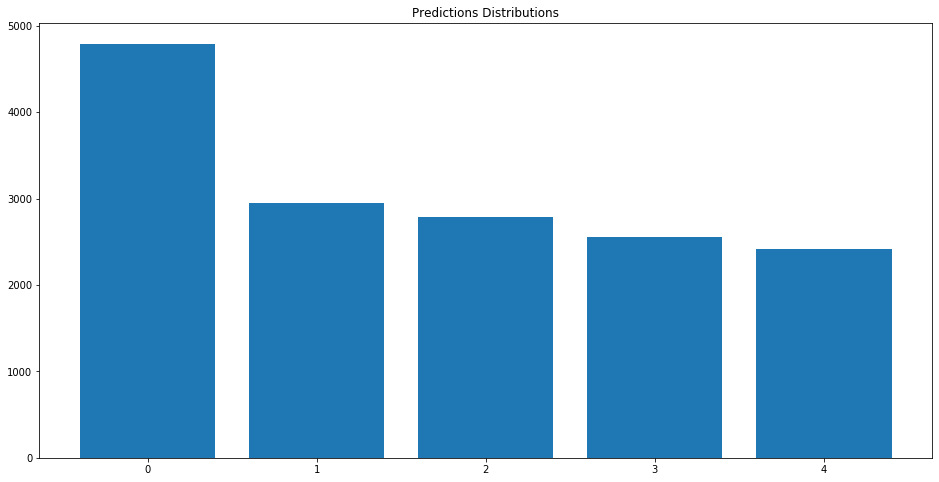

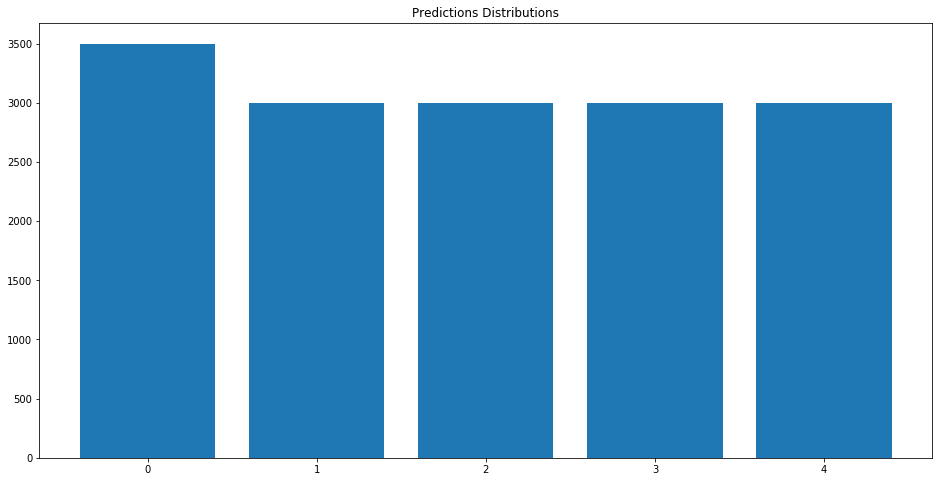

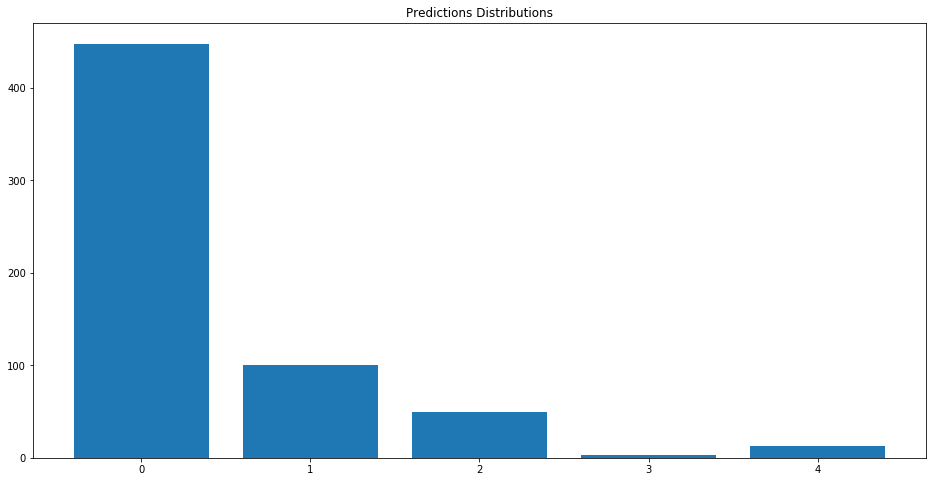

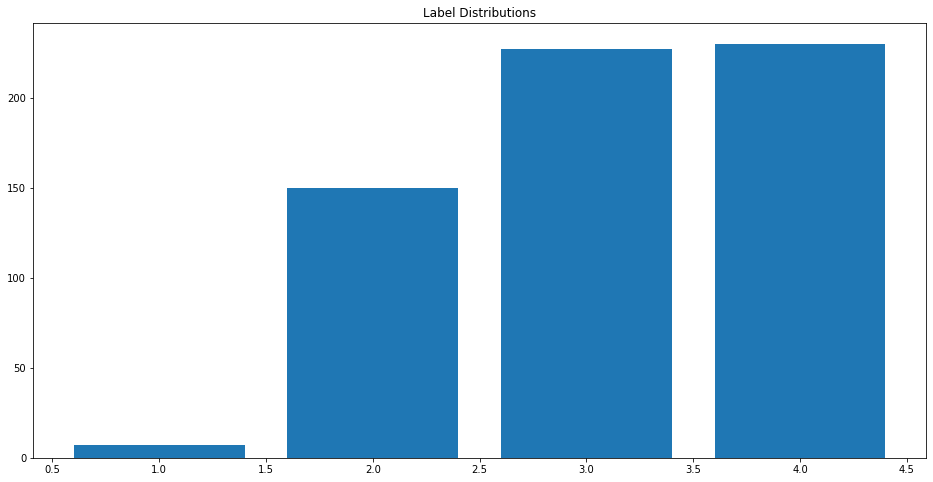

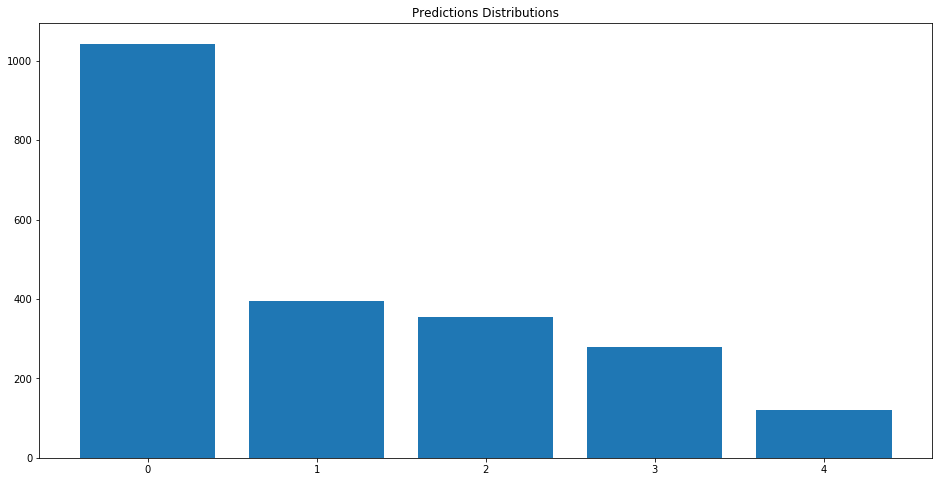

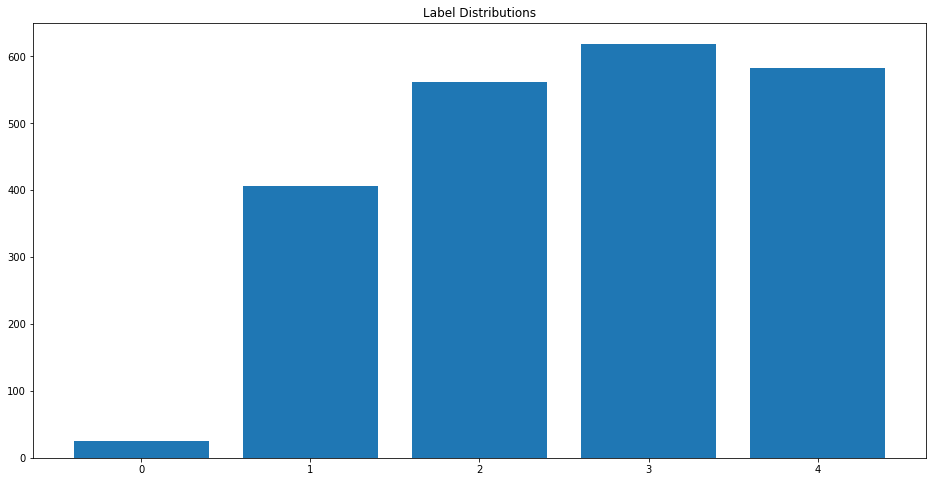

In [106]:
oof    = results[models].values
labels = results['label'].values

votes = []
voting_wrong, all_wrong, very_wrong = [], [], []
for i in range(oof.shape[0]):
    values, counts = np.unique(oof[i], return_counts = True)
    index = np.argmax(counts)
    votes.append(values[index])
    
    if labels[i] not in oof[i] and \
        labels[i] + 1 not in oof[i] and \
         labels[i] - 1 not in oof[i]:
          very_wrong.append(True)
    else:
          very_wrong.append(False)
            
    if labels[i] not in oof[i]:
        all_wrong.append(True)
    else:
        all_wrong.append(False)
            
    if labels[i] != values[index]:
        voting_wrong.append(True)
    else: 
        voting_wrong.append(False)

results['voting']       = votes
results['voting_wrong'] = voting_wrong
results['all_wrong']    = all_wrong
results['very_wrong']   = very_wrong
          
# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['voting'], return_counts = True))
# plt.title("Predictions Distributions")
# plt.show()

# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['label'], return_counts = True))
# plt.title("Label Distributions")
# plt.show()

R = lambda x: np.round(x, 3)
print(f"Voting Accuracy: {accuracy_score(results['label'], results['voting'])}")
      
voting_wrong_samples       = results[results['voting_wrong'] == 1].reset_index(drop = True)
voting_wrong_noisy_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_wrong_clear_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

voting_good_samples       = results[results['voting_wrong'] == 0].reset_index(drop = True)
voting_good_noisy_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_good_clear_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Voting Wrong: {voting_wrong_samples.shape[0]}  ({R(voting_wrong_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_wrong_noisy_samples.shape[0]} ({R(voting_wrong_noisy_samples.shape[0] / voting_wrong_samples.shape[0])}) -> Clear: {voting_wrong_clear_samples.shape[0]} ({R(voting_wrong_clear_samples.shape[0] / voting_wrong_samples.shape[0])})")
print(f"Voting Good:  {voting_good_samples.shape[0]} ({R(voting_good_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_good_noisy_samples.shape[0]} ({R(voting_good_noisy_samples.shape[0] / voting_good_samples.shape[0])}) -> Clear: {voting_good_clear_samples.shape[0]} ({R(voting_good_clear_samples.shape[0] / voting_good_samples.shape[0])})")

all_wrong_samples       = results[results['all_wrong'] == 1].reset_index(drop = True)
all_wrong_noisy_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
all_wrong_clear_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"All    Wrong: {all_wrong_samples.shape[0]}  ({R(all_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {all_wrong_noisy_samples.shape[0]} ({R(all_wrong_noisy_samples.shape[0] / all_wrong_samples.shape[0])}) -> Clear: {all_wrong_clear_samples.shape[0]} ({R(all_wrong_clear_samples.shape[0] / all_wrong_samples.shape[0])})")

      
very_wrong_samples       = results[results['very_wrong'] == 1].reset_index(drop = True)
very_wrong_noisy_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
very_wrong_clear_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Very   Wrong: {very_wrong_samples.shape[0]}   ({R(very_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {very_wrong_noisy_samples.shape[0]}  ({R(very_wrong_noisy_samples.shape[0] / very_wrong_samples.shape[0])}) -> Clear: {very_wrong_clear_samples.shape[0]}  ({R(very_wrong_clear_samples.shape[0] / very_wrong_samples.shape[0])})")

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()
      
plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results['label'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()
      
plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['very_wrong'] == 1]['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['very_wrong'] == 1]['label'], return_counts = True))
plt.title("Label Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['all_wrong'] == 1]['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['all_wrong'] == 1]['label'], return_counts = True))
plt.title("Label Distributions")
plt.show()
      
# display(results)

results['path'] = results['id'].apply(lambda x: os.path.join('data/detect-targets-in-radar-signals/', 'train', x))
# results.to_csv('error_analysis.csv')

In [12]:
# for group in very_wrong_samples.groupby('label'):
#     print(30 * '=' + f' Label: {group[0]} ' + 30 * '=')
#     group_copy = group[1].reset_index(drop = True)
#     plot_grid_images(group_copy, 10)
#     print('\n\n\n\n\n')

In [14]:
# cm = pd.DataFrame(confusion_matrix(results['label'], results['voting']))
# plt.figure(figsize = (16, 16))
# sn.heatmap(cm, annot = True, annot_kws = {"size": 16})
# plt.show()

# Grid Search (Stage-1)

In [44]:
logger_gpu_0 = pd.read_csv('../logs/stage-1/gpu-0/logger_gpu_0.csv')
logger_gpu_0['GPU'] = 0

logger_gpu_1 = pd.read_csv('../logs/stage-1/gpu-1/logger_gpu_1.csv')
logger_gpu_1['GPU'] = 1

logger = pd.concat([logger_gpu_0, logger_gpu_1], axis = 0).reset_index(drop = True)
logger['cross-validation'] = logger['cross-validation'].apply(lambda x: x[1:-1]).astype(np.float32)
display(logger)

,id,model_name,dropout,size,batch_size_t,batch_size_v,n_targets,criterion,gradient_accumulation_steps,max_gradient_norm,...,one_fold,use_apex,distributed_training,save_to_log,oof-accuracy,oof-precision,oof-recall,cross-validation,public-leaderboard,GPU
0,0,swin_large_patch4_window12_384_in22k,0.5,384,4,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.324194,0.629765,0.324194,0.717742,0,0
1,1,swin_large_patch4_window12_384_in22k,0.5,384,4,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.325484,0.634327,0.325484,0.724194,0,0
2,2,swin_large_patch4_window12_384_in22k,0.5,384,4,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.329806,0.640156,0.329806,0.745806,0,0
3,3,swin_large_patch4_window12_384_in22k,0.5,384,4,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.329742,0.646492,0.329742,0.745484,0,0
4,4,swin_large_patch4_window12_384_in22k,0.5,384,4,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.330516,0.645225,0.330516,0.749355,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,37,swin_large_patch4_window12_384_in22k,0.5,384,5,8,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.329484,0.635723,0.329484,0.744194,0,1
80,38,swin_large_patch4_window12_384_in22k,0.5,384,5,8,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.308000,0.564416,0.308000,0.636774,0,1
81,39,swin_large_patch4_window12_384_in22k,0.5,384,5,8,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.298323,0.490204,0.298323,0.588387,0,1
82,40,swin_large_patch4_window12_384_in22k,0.5,384,5,8,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.281097,0.390212,0.281097,0.502258,0,1


In [45]:
print(logger.columns.tolist())

['id', 'model_name', 'dropout', 'size', 'batch_size_t', 'batch_size_v', 'n_targets', 'criterion', 'gradient_accumulation_steps', 'max_gradient_norm', 'optimizer', 'scheduler', 'LR', 'T_0', 'T_max', 'T_mult', 'min_lr', 'max_lr', 'no_batches', 'warmup_epochs', 'cosine_epochs', 'epochs', 'update_per_batch', 'num_workers', 'n_folds', 'train_transforms', 'valid_transforms', 'observations', 'use_swa', 'swa_lr', 'swa_epoch', 'use_sam', 'use_asam', 'asam_rho', 'print_freq', 'one_fold', 'use_apex', 'distributed_training', 'save_to_log', 'oof-accuracy', 'oof-precision', 'oof-recall', 'cross-validation', 'public-leaderboard', 'GPU']


In [46]:
logger.groupby('optimizer')['cross-validation'].describe()

,count,mean,std,min,25%,50%,75%,max
optimizer,,,,,,,,
AdamW,42.0,0.620730,0.203466,0.225806,0.565161,0.734032,0.749113,0.769355
RangerLars,42.0,0.725284,0.032954,0.561290,0.718065,0.728548,0.744435,0.767742


In [47]:
logger.groupby('LR')['cross-validation'].describe()

,count,mean,std,min,25%,50%,75%,max
LR,,,,,,,,
0.000007,12.0,0.724409,0.013380,0.700645,0.717661,0.725323,0.733226,0.745484
0.000010,12.0,0.726290,0.017632,0.686774,0.719677,0.725323,0.740484,0.746774
0.000030,12.0,0.738790,0.015964,0.710968,0.725968,0.743065,0.750484,0.760000
0.000050,12.0,0.714409,0.061114,0.557419,0.712419,0.735968,0.749919,0.763226
0.000070,12.0,0.717742,0.057590,0.588387,0.709677,0.741129,0.750242,0.769355
0.000100,12.0,0.614785,0.198974,0.225806,0.542903,0.713710,0.740565,0.764839
0.000300,12.0,0.474624,0.265421,0.225806,0.225806,0.393548,0.748145,0.767742


In [48]:
logger.groupby(['scheduler', 'T_0'])['cross-validation'].describe()

count      mean       std       min  \
scheduler                   T_0                                        
CosineAnnealingWarmRestarts 200   28.0  0.686613  0.163426  0.225806   
                            500   28.0  0.684297  0.162536  0.225806   
OneCycleLR                  200   28.0  0.648111  0.137560  0.225806   

                                      25%       50%       75%       max  
scheduler                   T_0                                          
CosineAnnealingWarmRestarts 200  0.726371  0.740968  0.753306  0.769355  
                            500  0.721613  0.738387  0.748629  0.767742  
OneCycleLR                  200  0.618145  0.714194  0.722339  0.753871

In [49]:
logger.groupby('train_transforms')['cross-validation'].describe()

,count,mean,std,min,25%,50%,75%,max
train_transforms,,,,,,,,
"[HorizontalFlip(always_apply=False, p=0.5), VerticalFlip(always_apply=False, p=0.5), RandomRotate90(always_apply=False, p=0.5)]",42.0,0.657366,0.166968,0.225806,0.696290,0.727419,0.736694,0.754516
[],42.0,0.688648,0.140370,0.225806,0.718065,0.741129,0.753629,0.769355


In [50]:
best = logger.sort_values(by = 'cross-validation', ascending = False).head(n = 5)

In [51]:
display(best.iloc[0])

id                                                                4
model_name                     swin_large_patch4_window12_384_in22k
dropout                                                         0.5
size                                                            384
batch_size_t                                                      5
batch_size_v                                                     32
n_targets                                                         5
criterion                                          CrossEntropyLoss
gradient_accumulation_steps                                       1
max_gradient_norm                                               NaN
optimizer                                                     AdamW
scheduler                               CosineAnnealingWarmRestarts
LR                                                            7e-05
T_0                                                             200
T_max                                           

In [52]:
display(best.iloc[1])

id                                                               20
model_name                     swin_large_patch4_window12_384_in22k
dropout                                                         0.5
size                                                            384
batch_size_t                                                      4
batch_size_v                                                     32
n_targets                                                         5
criterion                                          CrossEntropyLoss
gradient_accumulation_steps                                       1
max_gradient_norm                                               NaN
optimizer                                                RangerLars
scheduler                               CosineAnnealingWarmRestarts
LR                                                           0.0003
T_0                                                             500
T_max                                           

In [53]:
display(best.iloc[2])

id                                                                6
model_name                     swin_large_patch4_window12_384_in22k
dropout                                                         0.5
size                                                            384
batch_size_t                                                      4
batch_size_v                                                     32
n_targets                                                         5
criterion                                          CrossEntropyLoss
gradient_accumulation_steps                                       1
max_gradient_norm                                               NaN
optimizer                                                RangerLars
scheduler                               CosineAnnealingWarmRestarts
LR                                                           0.0003
T_0                                                             200
T_max                                           

In [95]:
display(best.iloc[3])

id                                                               18
model_name                     swin_large_patch4_window12_384_in22k
dropout                                                         0.5
size                                                            384
batch_size_t                                                      5
batch_size_v                                                     32
n_targets                                                         5
criterion                                          CrossEntropyLoss
gradient_accumulation_steps                                       1
max_gradient_norm                                               NaN
optimizer                                                     AdamW
scheduler                               CosineAnnealingWarmRestarts
LR                                                            7e-05
T_0                                                             500
T_max                                           

In [81]:
ensamble = logger.sort_values(by = 'cross-validation', ascending = False).head(n = 1)
display(ensamble)

,id,model_name,dropout,size,batch_size_t,batch_size_v,n_targets,criterion,gradient_accumulation_steps,max_gradient_norm,...,one_fold,use_apex,distributed_training,save_to_log,oof-accuracy,oof-precision,oof-recall,cross-validation,public-leaderboard,GPU
46,4,swin_large_patch4_window12_384_in22k,0.5,384,5,32,5,CrossEntropyLoss,1,NaN,...,True,True,False,True,0.334516,0.664962,0.334516,0.769355,0,1


In [82]:
final = pd.DataFrame()
final['id'] = test_df['id']
for row, sample in ensamble.iterrows():
    ids = sample['id']
    gpu = sample['GPU']
    
    path_to_submission = f'../models/stage-1/gpu-{gpu}/model_{ids}/submission_stage_1_gpu_{gpu}_version_{ids}.csv'
    submission = pd.read_csv(path_to_submission)
    final[f'model-{ids}-gpu-{gpu}'] = submission['label']
    
display(final.corr())

,model-4-gpu-1
model-4-gpu-1,1.0


In [84]:
votes = final.drop('id', inplace = False, axis = 1).values

final_predictions = []
for i in range(votes.shape[0]):
    values, counts = np.unique(votes[i], return_counts = True)
    index = np.argmax(counts)
    final_predictions.append(values[index])
    
final_submission = pd.DataFrame()
final_submission['id']    = final['id']
final_submission['label'] = final_predictions
display(final_submission)

# final_submission.to_csv('../ensambles/first_1_votes_grid_search.csv', index = False)

,id,label
0,a5ce7900-4a92-4969-887b-882515678aaa.png,5
1,afac9315-be6d-49de-a02b-56ab6de79285.png,1
2,225ea6a6-6e0a-4c9b-b2ac-8ca32c9fa598.png,1
3,e5fbafa1-58c6-4aea-a3d5-3910483ef377.png,2
4,c3dff3c1-df96-47bc-a41d-be05eadaf701.png,1
...,...,...
5495,cecd691e-478a-427a-9ca4-600e63749570.png,2
5496,07037c6c-115d-4ca0-98e0-61c095c14188.png,2
5497,66ba6865-379e-4429-a271-1d38b964b066.png,1
5498,84ba943b-6b34-4b7f-a9d5-ebf667edcc1a.png,3


In [91]:
first = [1, 5, 10, 20, 30]

first_df = pd.DataFrame()
first_df['id'] = final['id']

for ids in first:
    submission = pd.read_csv(f'../ensambles/first_{ids}_votes_grid_search.csv')
    first_df[f'votes-{ids}'] = submission['label']
    
display(first_df)
display(first_df.corr())

,id,votes-1,votes-5,votes-10,votes-20,votes-30
0,a5ce7900-4a92-4969-887b-882515678aaa.png,5,5,5,5,5
1,afac9315-be6d-49de-a02b-56ab6de79285.png,1,1,1,1,1
2,225ea6a6-6e0a-4c9b-b2ac-8ca32c9fa598.png,1,2,2,2,2
3,e5fbafa1-58c6-4aea-a3d5-3910483ef377.png,2,2,2,2,2
4,c3dff3c1-df96-47bc-a41d-be05eadaf701.png,1,1,1,1,1
...,...,...,...,...,...,...
5495,cecd691e-478a-427a-9ca4-600e63749570.png,2,2,2,2,2
5496,07037c6c-115d-4ca0-98e0-61c095c14188.png,2,2,2,4,2
5497,66ba6865-379e-4429-a271-1d38b964b066.png,1,1,1,1,2
5498,84ba943b-6b34-4b7f-a9d5-ebf667edcc1a.png,3,3,3,3,3


,votes-1,votes-5,votes-10,votes-20,votes-30
votes-1,1.000000,0.931715,0.926286,0.911826,0.907587
votes-5,0.931715,1.000000,0.955451,0.935890,0.923381
votes-10,0.926286,0.955451,1.000000,0.958787,0.943200
votes-20,0.911826,0.935890,0.958787,1.000000,0.973662
votes-30,0.907587,0.923381,0.943200,0.973662,1.000000


In [107]:
first_df_votes = first_df.drop('id', inplace = False, axis = 1).values
final_ensambles_predictions = []
for i in range(first_df_votes.shape[0]):
    values, counts = np.unique(first_df_votes[i], return_counts = True)
    index = np.argmax(counts)
    final_ensambles_predictions.append(values[index])
    
first_df['votes'] = final_ensambles_predictions
display(first_df.corr())

final_submission = pd.DataFrame()
final_submission['id']    = final['id']
final_submission['label'] = final_ensambles_predictions
display(final_submission)

# final_submission.to_csv('../ensambles/ensamble_mix_votes_grid_search.csv', index = False)

,votes-1,votes-5,votes-10,votes-20,votes-30,votes
votes-1,1.000000,0.931715,0.926286,0.911826,0.907587,0.932228
votes-5,0.931715,1.000000,0.955451,0.935890,0.923381,0.957014
votes-10,0.926286,0.955451,1.000000,0.958787,0.943200,0.976118
votes-20,0.911826,0.935890,0.958787,1.000000,0.973662,0.975498
votes-30,0.907587,0.923381,0.943200,0.973662,1.000000,0.961953
votes,0.932228,0.957014,0.976118,0.975498,0.961953,1.000000


,id,label
0,a5ce7900-4a92-4969-887b-882515678aaa.png,5
1,afac9315-be6d-49de-a02b-56ab6de79285.png,1
2,225ea6a6-6e0a-4c9b-b2ac-8ca32c9fa598.png,2
3,e5fbafa1-58c6-4aea-a3d5-3910483ef377.png,2
4,c3dff3c1-df96-47bc-a41d-be05eadaf701.png,1
...,...,...
5495,cecd691e-478a-427a-9ca4-600e63749570.png,2
5496,07037c6c-115d-4ca0-98e0-61c095c14188.png,2
5497,66ba6865-379e-4429-a271-1d38b964b066.png,1
5498,84ba943b-6b34-4b7f-a9d5-ebf667edcc1a.png,3


# Stage-1

In [134]:
MODELS_GPU_0 = [43]
PATH_TO_PREDICTIONS_GPU_0 = '../logs/stage-1/gpu-0/oof.csv'
predictions_gpu_0 = pd.read_csv(PATH_TO_PREDICTIONS_GPU_0).drop(["label"], axis = 1, inplace = False)
predictions_gpu_0 = predictions_gpu_0.rename(columns = {column : f"gpu_0_{column}" for column in predictions_gpu_0.columns.tolist() if column != 'id'})

MODELS_GPU_1 = [42, 43]
PATH_TO_PREDICTIONS_GPU_1 = '../logs/stage-1/gpu-1/oof.csv'
predictions_gpu_1 = pd.read_csv(PATH_TO_PREDICTIONS_GPU_1).drop(["label"], axis = 1, inplace = False)
predictions_gpu_1 = predictions_gpu_1.rename(columns = {column : f"gpu_1_{column}" for column in predictions_gpu_1.columns.tolist() if column != 'id'})


MODELS = MODELS_GPU_0 + MODELS_GPU_1
predictions = predictions_gpu_0.merge(predictions_gpu_1, on = 'id', how = 'inner')

predictions['label']    = train_df['label']
predictions['is_noisy'] = results['is_noisy']
results = predictions
display(predictions)

,id,gpu_0_model_42,gpu_0_model_43,gpu_1_model_42,gpu_1_model_43,label,is_noisy
0,ae36b992-7c8d-42c6-851f-51aca56285ec.png,1.0,1.0,1.0,1.0,1,1
1,09c10b66-6d7e-4688-aa26-42b75cf5e1e9.png,1.0,1.0,1.0,1.0,1,0
2,da6684f7-aabb-49e6-8bb0-c4e048e2dbba.png,1.0,1.0,1.0,1.0,2,0
3,032dd82e-8776-476c-8d80-8e67d1d4909f.png,5.0,5.0,5.0,5.0,5,0
4,e0a6d04b-18fa-4b15-89e2-6cb74fbcf437.png,2.0,2.0,2.0,2.0,2,0
...,...,...,...,...,...,...,...
15495,b0b08f42-83f2-424d-bf29-85a1e55606fd.png,1.0,1.0,1.0,1.0,1,0
15496,05bb64ec-cc16-4260-ad37-de5c4139ae39.png,3.0,3.0,3.0,3.0,4,0
15497,f3417069-c8b0-4a59-a834-4f44932eab30.png,5.0,5.0,5.0,5.0,5,0
15498,c65d1b1c-2c52-4c79-8b04-068798fa6734.png,1.0,1.0,1.0,1.0,3,0


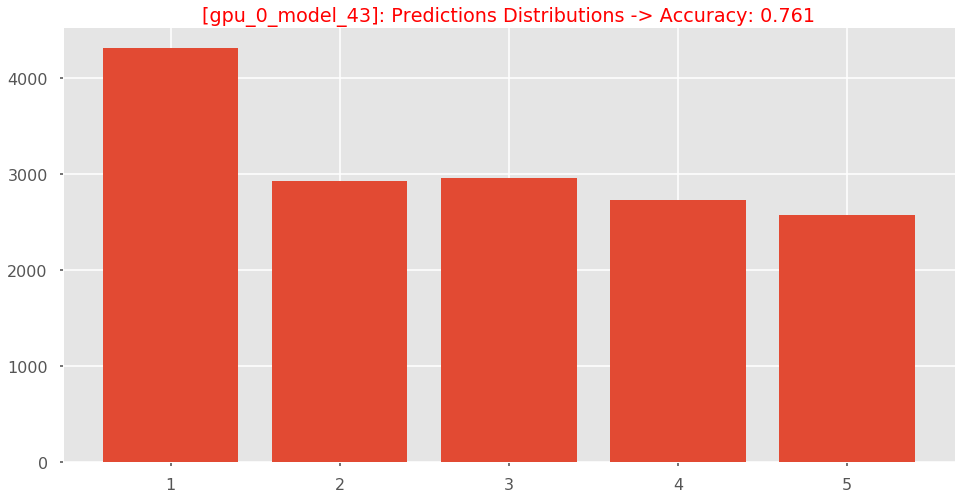

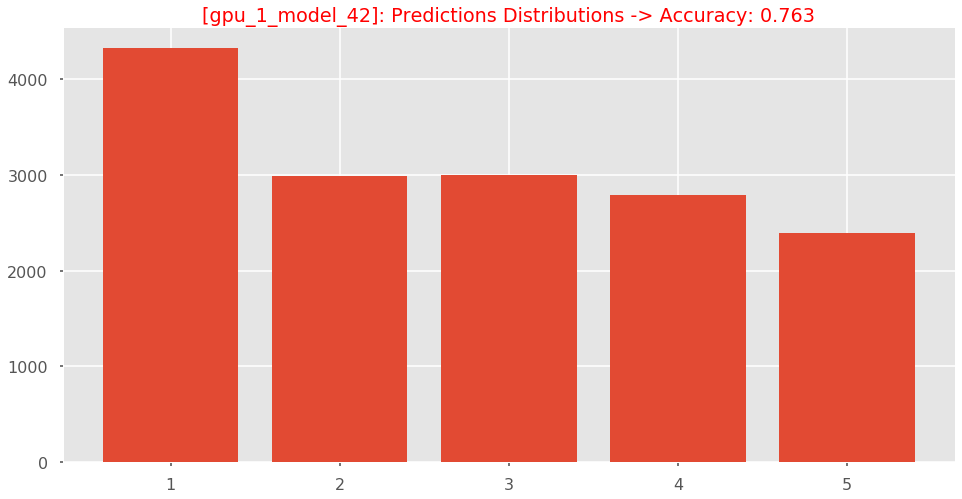

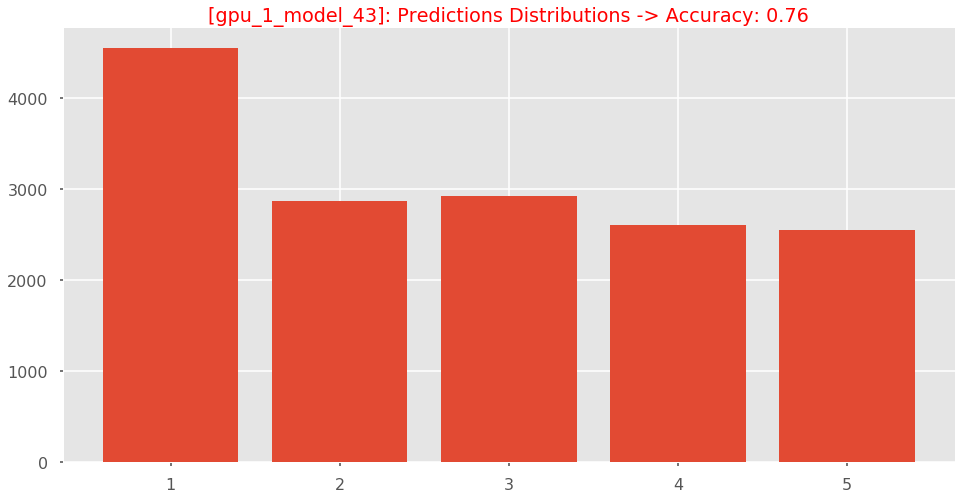

In [135]:
MODELS = [f'gpu_{gpu}_model_{model}' for (gpu, model) in [(0, 43), (1, 42), (1, 43)]]
for model in MODELS:
    plt.figure(figsize = (16, 8))
    accuracy = accuracy_score(predictions[model], predictions['label'])
    plt.bar(*np.unique(predictions[model], return_counts = True))
    plt.title(f"[{model}]: Predictions Distributions -> Accuracy: {RD(accuracy)}", color = 'red')
    plt.show()

In [138]:
train_noisy = predictions[predictions['is_noisy'] == 1].reset_index(drop = True)
train_clear = predictions[predictions['is_noisy'] == 0].reset_index(drop = True)

test_noisy = test_df[test_df['is_noisy'] == 1].reset_index(drop = True)
test_clear = test_df[test_df['is_noisy'] == 0].reset_index(drop = True)

print('=' * 55)
print(f"No. of train noisy samples: {train_noisy.shape[0]}")
print(f"No. of train clear samples: {train_clear.shape[0]}")

print(f"No. of test noisy samples: {test_noisy.shape[0]}")
print(f"No. of test clear samples: {test_clear.shape[0]}")


print('=' * 55)
for model in MODELS:
    print(f"[Noisy] Model {model}: {accuracy_score(train_noisy['label'], train_noisy[model])}")
    print(f"[Clear] Model {model}: {accuracy_score(train_clear['label'], train_clear[model])}")
    print(f"[All]   Model {model}: {accuracy_score(predictions['label'], predictions[model])}")
    print('=' * 55)

No. of train noisy samples: 4278
No. of train clear samples: 11222
No. of test noisy samples: 1500
No. of test clear samples: 4000
[Noisy] Model gpu_0_model_43: 0.5603085553997195
[Clear] Model gpu_0_model_43: 0.8371056852610943
[All]   Model gpu_0_model_43: 0.7607096774193548
[Noisy] Model gpu_1_model_42: 0.5612435717625058
[Clear] Model gpu_1_model_42: 0.8395116734984851
[All]   Model gpu_1_model_42: 0.7627096774193548
[Noisy] Model gpu_1_model_43: 0.5572697522206639
[Clear] Model gpu_1_model_43: 0.83746212796293
[All]   Model gpu_1_model_43: 0.7601290322580645


Voting Accuracy: 0.7678709677419355
Voting Wrong: 3598  (0.232)  -> Noisy: 1849 (0.514) -> Clear: 1749 (0.486)
Voting Good:  11902 (0.768)  -> Noisy: 2429 (0.204) -> Clear: 9473 (0.796)
All    Wrong: 2790  (0.18) -> Noisy: 1480 (0.53) -> Clear: 1310 (0.47)
Very   Wrong: 840   (0.054) -> Noisy: 611  (0.727) -> Clear: 229  (0.273)


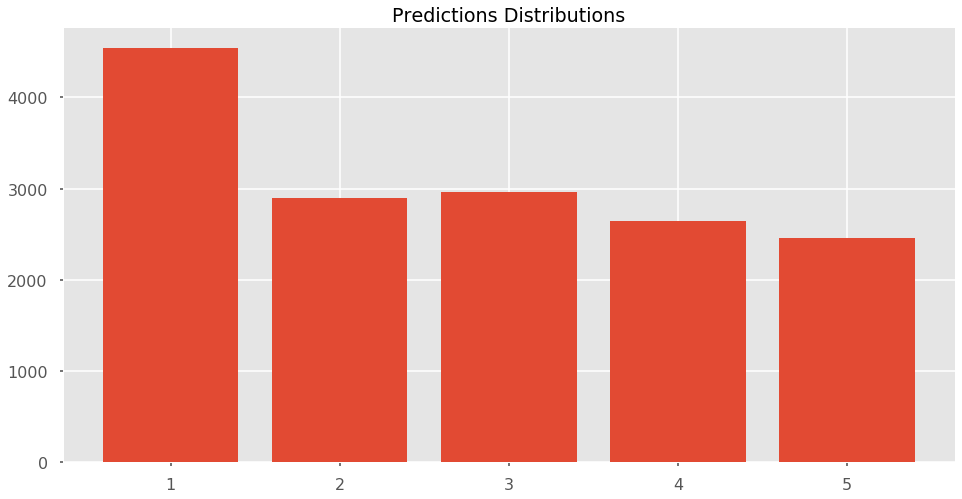

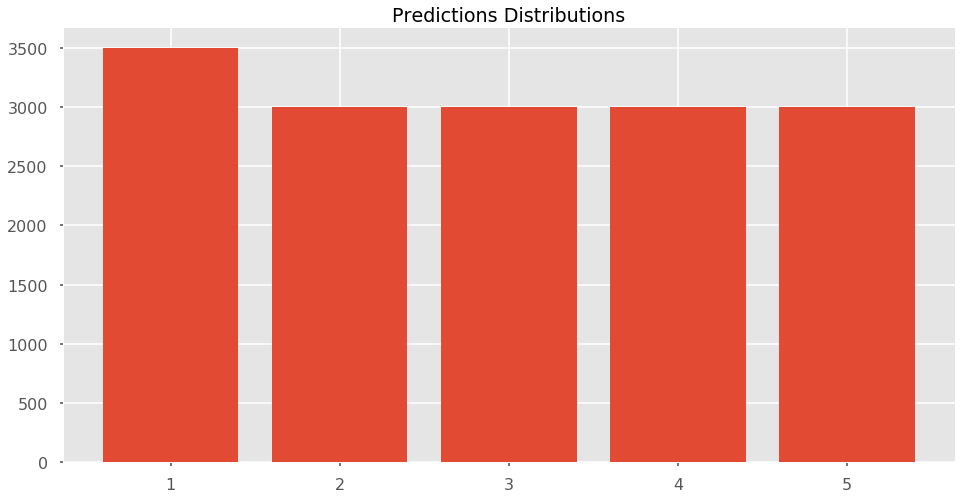

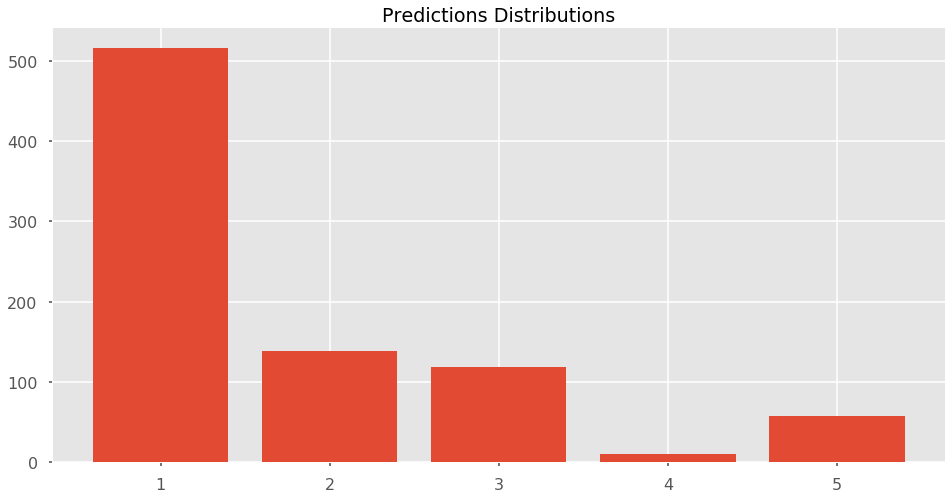

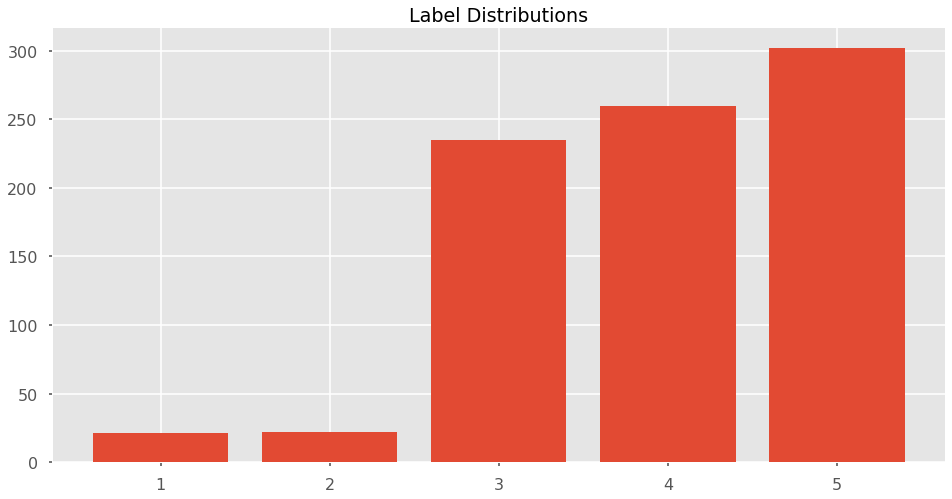

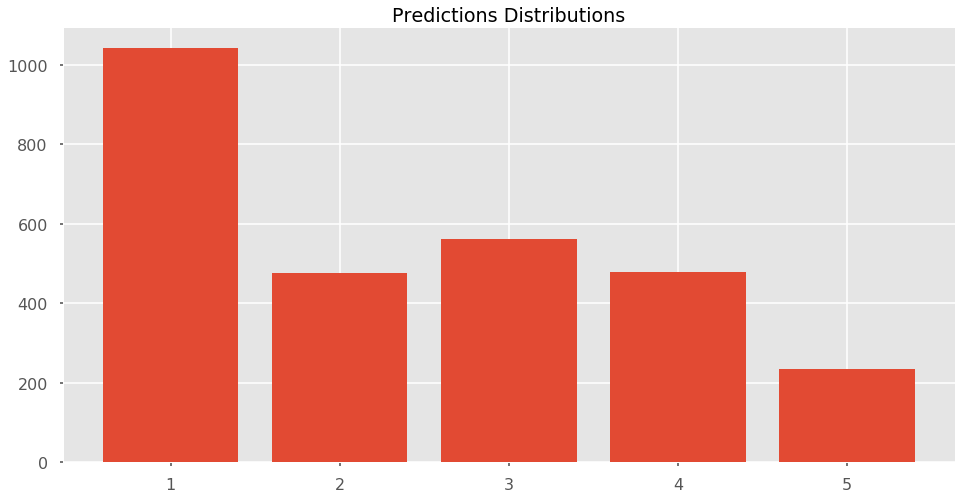

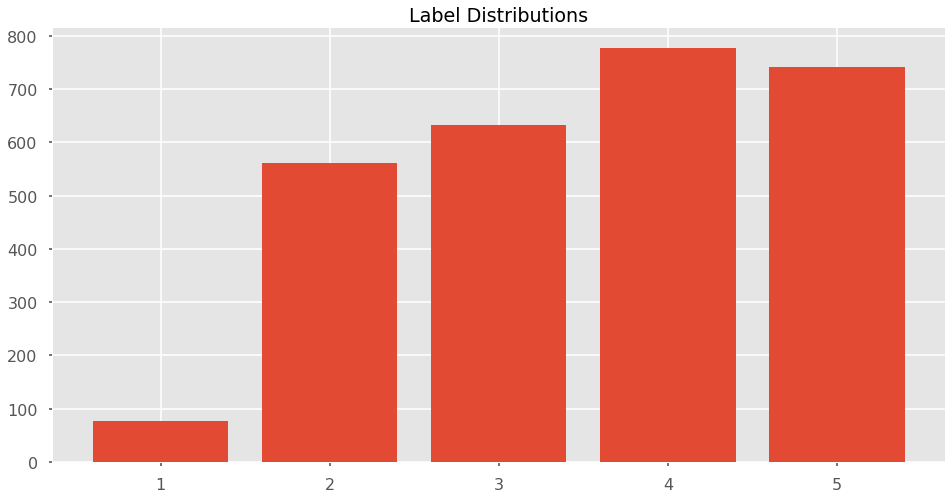

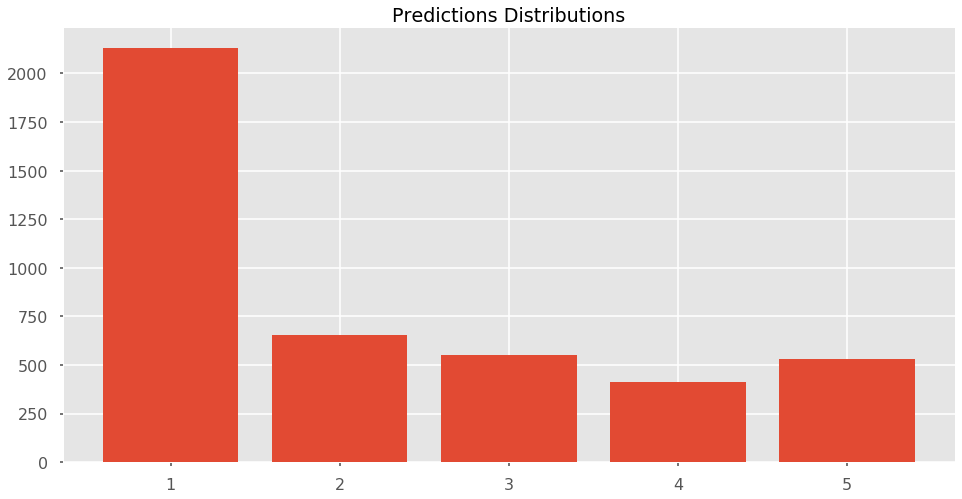

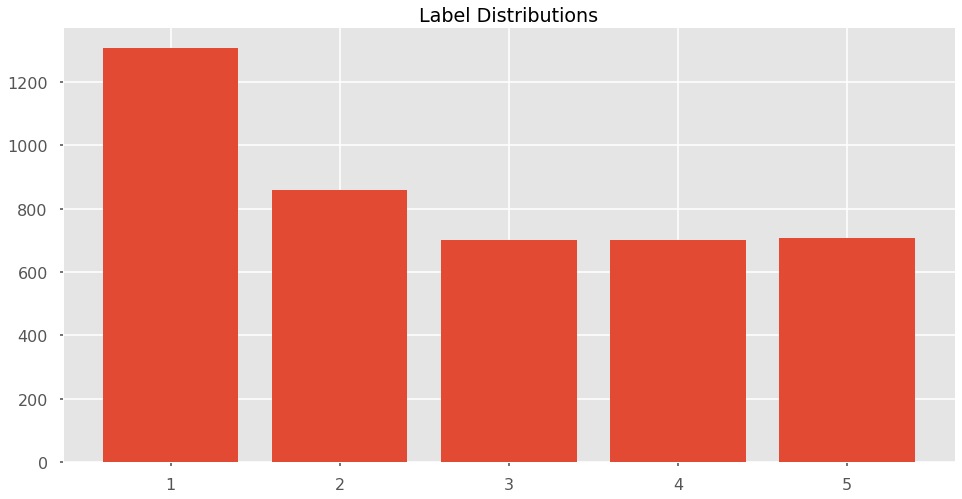

In [140]:
oof    = results[MODELS].values
labels = results['label'].values

votes = []
voting_wrong, all_wrong, very_wrong = [], [], []
for i in range(oof.shape[0]):
    values, counts = np.unique(oof[i], return_counts = True)
    index = np.argmax(counts)
    votes.append(values[index])
    
    if labels[i] not in oof[i] and \
        labels[i] + 1 not in oof[i] and \
         labels[i] - 1 not in oof[i]:
          very_wrong.append(True)
    else:
          very_wrong.append(False)
            
    if labels[i] not in oof[i]:
        all_wrong.append(True)
    else:
        all_wrong.append(False)
            
    if labels[i] != values[index]:
        voting_wrong.append(True)
    else: 
        voting_wrong.append(False)

results['voting']       = votes
results['voting_wrong'] = voting_wrong
results['all_wrong']    = all_wrong
results['very_wrong']   = very_wrong
          
# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['voting'], return_counts = True))
# plt.title("Predictions Distributions")
# plt.show()

# plt.figure(figsize = (16, 8))
# plt.bar(*np.unique(results['label'], return_counts = True))
# plt.title("Label Distributions")
# plt.show()

R = lambda x: np.round(x, 3)
print(f"Voting Accuracy: {accuracy_score(results['label'], results['voting'])}")
      
voting_wrong_samples       = results[results['voting_wrong'] == 1].reset_index(drop = True)
voting_wrong_noisy_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_wrong_clear_samples = results[(results['voting_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

voting_good_samples       = results[results['voting_wrong'] == 0].reset_index(drop = True)
voting_good_noisy_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 1)].reset_index(drop = True)      
voting_good_clear_samples = results[(results['voting_wrong'] == 0) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Voting Wrong: {voting_wrong_samples.shape[0]}  ({R(voting_wrong_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_wrong_noisy_samples.shape[0]} ({R(voting_wrong_noisy_samples.shape[0] / voting_wrong_samples.shape[0])}) -> Clear: {voting_wrong_clear_samples.shape[0]} ({R(voting_wrong_clear_samples.shape[0] / voting_wrong_samples.shape[0])})")
print(f"Voting Good:  {voting_good_samples.shape[0]} ({R(voting_good_samples.shape[0] / results.shape[0])})  -> Noisy: {voting_good_noisy_samples.shape[0]} ({R(voting_good_noisy_samples.shape[0] / voting_good_samples.shape[0])}) -> Clear: {voting_good_clear_samples.shape[0]} ({R(voting_good_clear_samples.shape[0] / voting_good_samples.shape[0])})")

all_wrong_samples       = results[results['all_wrong'] == 1].reset_index(drop = True)
all_wrong_noisy_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
all_wrong_clear_samples = results[(results['all_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"All    Wrong: {all_wrong_samples.shape[0]}  ({R(all_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {all_wrong_noisy_samples.shape[0]} ({R(all_wrong_noisy_samples.shape[0] / all_wrong_samples.shape[0])}) -> Clear: {all_wrong_clear_samples.shape[0]} ({R(all_wrong_clear_samples.shape[0] / all_wrong_samples.shape[0])})")

      
very_wrong_samples       = results[results['very_wrong'] == 1].reset_index(drop = True)
very_wrong_noisy_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 1)].reset_index(drop = True)      
very_wrong_clear_samples = results[(results['very_wrong'] == 1) & (results['is_noisy'] == 0)].reset_index(drop = True)      

print(f"Very   Wrong: {very_wrong_samples.shape[0]}   ({R(very_wrong_samples.shape[0] / results.shape[0])}) -> Noisy: {very_wrong_noisy_samples.shape[0]}  ({R(very_wrong_noisy_samples.shape[0] / very_wrong_samples.shape[0])}) -> Clear: {very_wrong_clear_samples.shape[0]}  ({R(very_wrong_clear_samples.shape[0] / very_wrong_samples.shape[0])})")

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()
      
plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results['label'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()
      
plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['very_wrong'] == 1]['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['very_wrong'] == 1]['label'], return_counts = True))
plt.title("Label Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['all_wrong'] == 1]['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['all_wrong'] == 1]['label'], return_counts = True))
plt.title("Label Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['is_noisy'] == 1]['voting'], return_counts = True))
plt.title("Predictions Distributions")
plt.show()

plt.figure(figsize = (16, 8))
plt.bar(*np.unique(results[results['is_noisy'] == 1]['label'], return_counts = True))
plt.title("Label Distributions")
plt.show()

# display(results)

results['path'] = results['id'].apply(lambda x: os.path.join('data/detect-targets-in-radar-signals/', 'train', x))